<font size=6> Сборный проект - 2 </font>

## Описание


Данное исследование проводится в рамках сотрудничества с компанией «Работа с заботой», целью которого является оптимизация управления персоналом с использованием методов машинного обучения. Компания предоставила данные, характеризующие сотрудников, включая уровень удовлетворённости работой, рассчитанный на основе тестов-опросников (от 0 — полностью неудовлетворён, до 1 — полностью удовлетворён). Сбор таких данных осложнён масштабами компании, что делает автоматизацию предсказания актуальной задачей. Исследование направлено на разработку двух моделей: первой — для предсказания уровня удовлетворённости сотрудников, второй — для прогнозирования их оттока. Эти модели позволят минимизировать финансовые потери и риски, связанные с внезапными увольнениями, особенно ключевых специалистов.

* Цель исследования
Основная цель — создание эффективных инструментов машинного обучения для предсказания удовлетворённости сотрудников и вероятности их увольнения, что обеспечит бизнесу возможность своевременного реагирования на потенциальные проблемы с персоналом.

* Суть исследования
Исследование направлено на анализ предоставленных данных для разработки стратегии управления персоналом. Это включает выявление факторов, влияющих на удовлетворённость и отток, а также построение моделей для их предсказания, что позволит компании оптимизировать кадровую политику.

* Задачи исследования
Для достижения цели необходимо выполнить следующие действия:
- Провести предварительный анализ данных и их предобработку.
- Разработать и обучить модель для предсказания уровня удовлетворённости сотрудников.
- Построить модель для классификации сотрудников по вероятности увольнения.
- Оценить эффективность моделей и интерпретировать результаты для бизнес-применения.

* Исходные данные
Исследование базируется на предоставленных компанией таблицах, содержащих характеристики сотрудников, включая  показатели производительности, уровень удовлетворённости и факт увольнения. Данные требуют обработки для устранения пропусков и аномалий.

* Структура исследования
Данное исследование разделено на несколько частей:

[**Часть 1. Изучение общей информации:**](#s1)
1. Изучение файлов с данными, загрузка необходимых библиотек и получение общей информации.
2. Идентификация и устранение пропусков в данных.

[**Часть 2. Подготовка данных:**](#s2)
1. Приведение типов данных к требуемому формату.
2. Обнаружение и коррекция аномалий и ошибок.

[**Часть 3. Исследовательский анализ данных:**](#s3)
1. Анализ распределения признаков и их взаимосвязей.
2. Выявление ключевых факторов, влияющих на целевые переменные.

[**Часть 4. Моделирование:**](#s4)
1. Разработка и обучение моделей для предсказания удовлетворённости.
2. Построение и оптимизация моделей для предсказания оттока.
3. Оценка результатов с использованием метрики SMAPE.

[**Часть 5. Промежуточные выводы:**](#s5)
1. Интерпретация результатов моделирования.
2. Формулирование рекомендаций для бизнеса на основе анализа.

[**Часть 6. Добавление новых признаков и пересмотр модели:**](#s6)
1. Изучить новые признаки
2. Обработать их, провести исследовательский анализ
3. Выявить закономерности

[**Часть 6. Финальная модель:**](#s7)
1. Обучение новой модели, с учетом данных предыдущей.
2. Оценка полученных данных
3. Общие выводы

Проект будет реализован последовательно согласно указанному плану, что обеспечит структурированный подход и высокое качество результатов.

## Задача - 1 "предсказание уровня удовлетворённости сотрудника"

### Описание задачи

Для этой задачи заказчик предоставил данные с признаками:


id — уникальный идентификатор сотрудника;


dept — отдел, в котором работает сотрудник;


level — уровень занимаемой должности;


workload — уровень загруженности сотрудника;


employment_years — длительность работы в компании (в годах);


last_year_promo — показывает, было ли повышение за последний год;


last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;


supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;


salary — ежемесячная зарплата сотрудника;


job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.


### Подключение необходимых библиотек и загрузка данных

In [1]:
!pip install -q pandas numpy matplotlib seaborn phik scikit-learn shap --

In [2]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from phik import phik_matrix

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    FunctionTransformer
)
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [3]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [4]:
try:
    train_df = pd.read_csv('//Users/macos/composite_project/train_job_satisfaction_rate.csv')
    test_df = pd.read_csv('//Users/macos/composite_project/test_features.csv')
    test_target_df = pd.read_csv('//Users/macos/composite_project/test_target_job_satisfaction_rate.csv')
except:
    train_df = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
    test_df = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
    test_target_df = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('future.no_silent_downcasting', True)

In [6]:
display(train_df.head())
display(test_df.head())
test_target_df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


<b><font color='blue'>Вывод по разделу 2:</font></b>

Библиотеки подключены, данные считаны адекватно. Пришло время с ними познакомиться.

### Предобрбаотка данных

<a id='s2'></a>

In [7]:
display(train_df.columns)
display(test_df.columns)
test_target_df.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'job_satisfaction_rate'],
      dtype='object')

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary'],
      dtype='object')

Index(['id', 'job_satisfaction_rate'], dtype='object')

In [8]:
def express_analysis(df):
    data = {
        'type' : df.dtypes,
        'count_dupl' : [],
        'count_nan' : []
    }
    
    for x in df.columns:
        data['count_dupl'].append(df[x].duplicated().sum())
        data['count_nan'].append(df[x].isna().sum())
    
    return pd.DataFrame(data)

In [9]:
def cat_col_analysis(df):
    cat_col = df.select_dtypes(exclude='number').columns.tolist()
    cat_info = {
        'unique_count' : []
    }
    
    #все строковые данные очистим от лишних символов, пробелов и заглавных букв
    for x in cat_col: 
        df[x]= df[x].str.lower()
        df[x]= df[x].replace(r' ', '_', regex=True)
        df[x]= df[x].replace('%','', regex=True)
        cat_info['unique_count'].append(dict(Counter(df[x])))
            
    return pd.DataFrame(cat_info, index=cat_col) 

In [10]:
def num_col_analysis(df):
    num_col = df.select_dtypes(include='number').columns.drop('id').tolist()
    cols_per_row = (len(num_col) + 2 - 1) // 2
    fig, axes = plt.subplots(nrows=2, ncols=cols_per_row, figsize=(15, 6), sharey=False)
    
    
    for ax in axes.ravel()[len(num_col):]:
        ax.remove()
        
    for col_name, ax in zip(num_col, axes.ravel()):
        ax.boxplot(df[col_name])
        ax.set_title(col_name)
        ax.set_ylabel('Значения')
        ax.grid(True)
    plt.tight_layout()
    plt.show()
    
    return df[num_col].describe()

#### train_df

,type,count_dupl,count_nan
id,int64,0,0
dept,object,3994,6
level,object,3996,4
workload,object,3997,0
employment_years,int64,3990,0
last_year_promo,object,3998,0
last_year_violations,object,3998,0
supervisor_evaluation,int64,3995,0
salary,int64,3932,0
job_satisfaction_rate,float64,3902,0


,unique_count
dept,"{'sales': 1512, 'hr': 456, 'technology': 866, 'purchasing': 610, 'marketing': 550, nan: 6}"
level,"{'junior': 1894, 'middle': 1744, 'sinior': 358, nan: 4}"
workload,"{'medium': 2066, 'high': 734, 'low': 1200}"
last_year_promo,"{'no': 3880, 'yes': 120}"
last_year_violations,"{'no': 3441, 'yes': 559}"


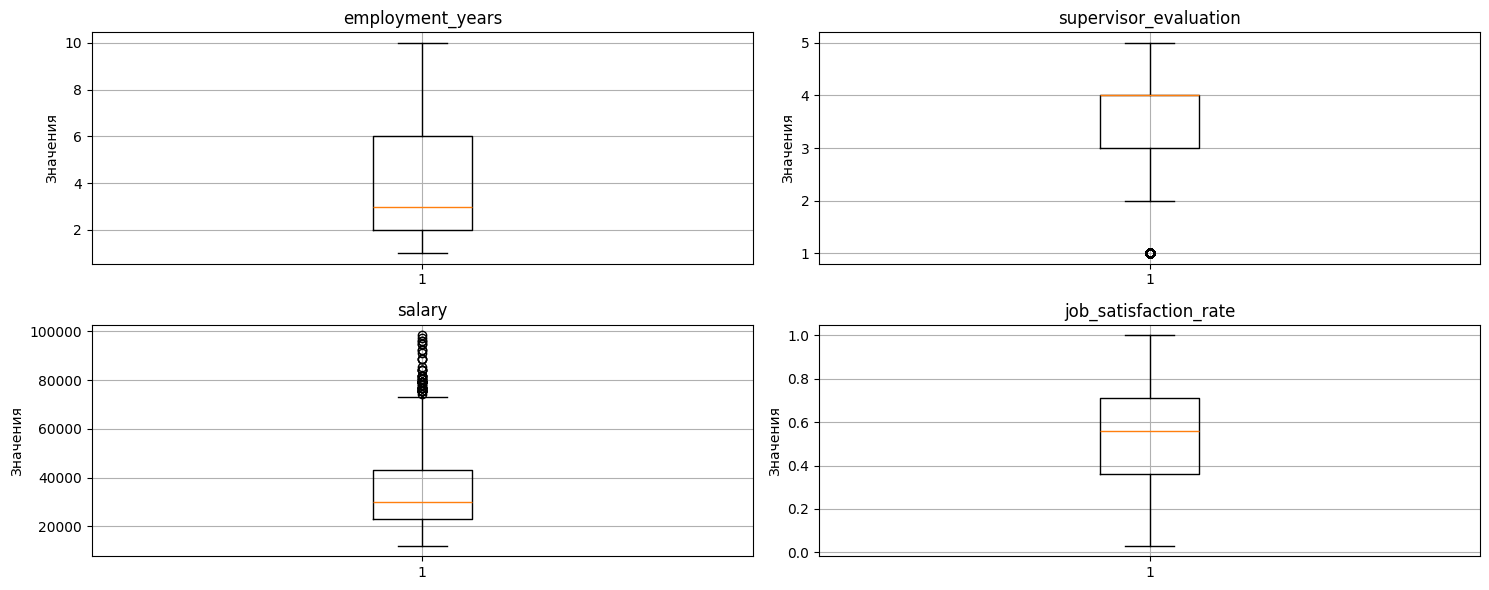

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


In [11]:
display(express_analysis(train_df))
display(cat_col_analysis(train_df))
num_col_analysis(train_df)

* Стаж работы (employment_years): Средний стаж составляет 3.72 года при стандартном отклонении 2.54 года, что указывает на умеренную вариабельность. Минимальное значение — 1 год, максимальное — 10 лет, с межквартильным диапазоном от 2 до 6 лет и медианой 3 года. Распределение близко к симметричному, но с возможным правым смещением из-за верхней границы в 10 лет.
* Оценка руководителя (supervisor_evaluation): Средняя оценка равна 3.48 при стандартном отклонении 1.01, что отражает относительно узкий разброс вокруг среднего. Значения варьируются от 1 до 5, с медианой и третьим квартилем на уровне 4, что свидетельствует о преобладании высоких оценок (4 и 5) и меньшей доле низких (1 и 2).
* Зарплата (salary): Средняя зарплата составляет 33926.70 с высоким стандартным отклонением 14900.70, указывающим на значительную дисперсию. Диапазон от 12000 до 98400, с межквартильным интервалом 22800–43200 и медианой 30000, предполагает правосмещённое распределение, где большинство сотрудников получают зарплату около медианы, а высокие значения (до 98400) редки.
* Уровень удовлетворённости работой (job_satisfaction_rate): Среднее значение 0.534 при стандартном отклонении 0.225 указывает на умеренную удовлетворённость с заметной вариабельностью. Диапазон от 0.03 до 1.0, с первым квартилем 0.36 и медианой 0.56, показывает, что значительная часть сотрудников (25%) имеет низкую удовлетворённость (менее 0.36), тогда как верхний квартиль (0.71) достигает высоких значений, близких к максимуму.

In [12]:
X_train = train_df.drop(columns='job_satisfaction_rate')
y_train = train_df['job_satisfaction_rate']

Из всех данных смущают только nan, дубликаты нехотелось бы видеть только в строке id, категориальные без повторов, числовые распредлены адекватно.

В обнаруженных столбцах заполним пропуски с помощью пайплайна.

In [13]:
col_for_simp = ['dept', 'level']

In [14]:
simp_pipe = Pipeline(
[
    ('simp', SimpleImputer(strategy='most_frequent'))
])


pre_preprocessor = ColumnTransformer(
    [
        ('simp', simp_pipe, col_for_simp)
    ], 
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [15]:
train_df = pre_preprocessor.fit_transform(train_df)

express_analysis(train_df)

,type,count_dupl,count_nan
dept,object,3995,0
level,object,3997,0
id,int64,0,0
workload,object,3997,0
employment_years,int64,3990,0
last_year_promo,object,3998,0
last_year_violations,object,3998,0
supervisor_evaluation,int64,3995,0
salary,int64,3932,0
job_satisfaction_rate,float64,3902,0


In [16]:
train_df.head()

,dept,level,id,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,junior,155278,medium,2,no,no,1,24000,0.58
1,hr,junior,653870,high,2,no,no,5,38400,0.76
2,sales,junior,184592,low,1,no,no,2,12000,0.11
3,technology,junior,171431,low,4,no,no,2,18000,0.37
4,hr,junior,693419,medium,1,no,no,3,22800,0.20


#### test_df

test_df объединю с целевым для исключения ситуаций потери взаимосвязи, сбития id и тд

In [17]:
test_df = pd.merge(test_df, test_target_df, on='id')

,type,count_dupl,count_nan
id,int64,0,0
dept,object,1993,2
level,object,1996,1
workload,object,1996,0
employment_years,int64,1990,0
last_year_promo,object,1998,0
last_year_violations,object,1998,0
supervisor_evaluation,int64,1995,0
salary,int64,1934,0
job_satisfaction_rate,float64,1902,0


,unique_count
dept,"{'marketing': 279, 'hr': 227, 'sales': 763, 'purchasing': 273, 'technology': 455, nan: 2, '_': 1}"
level,"{'junior': 974, 'middle': 854, 'sinior': 171, nan: 1}"
workload,"{'medium': 1043, 'low': 593, 'high': 363, '_': 1}"
last_year_promo,"{'no': 1937, 'yes': 63}"
last_year_violations,"{'no': 1738, 'yes': 262}"


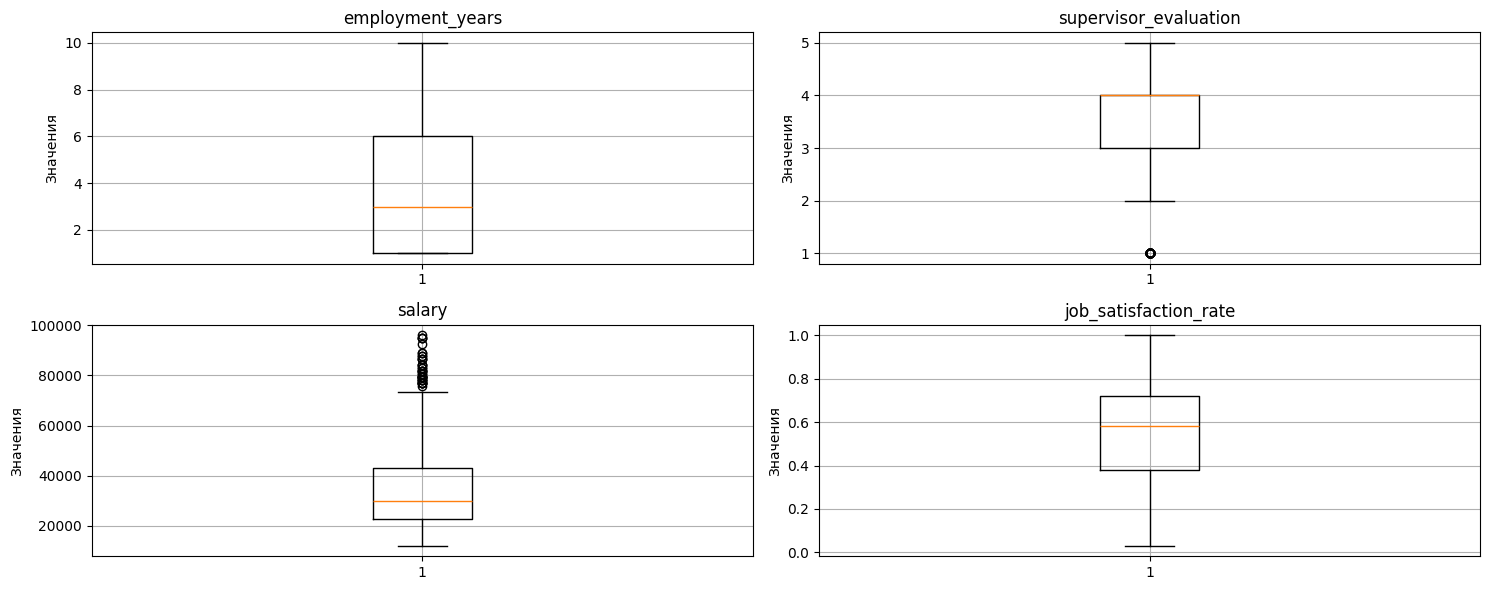

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,2000.000000,2000.000000,2000.000000,2000.00000
mean,3.666500,3.526500,34066.800000,0.54878
std,2.537222,0.996892,15398.436729,0.22011
min,1.000000,1.000000,12000.000000,0.03000
25%,1.000000,3.000000,22800.000000,0.38000
50%,3.000000,4.000000,30000.000000,0.58000
75%,6.000000,4.000000,43200.000000,0.72000
max,10.000000,5.000000,96000.000000,1.00000


In [18]:
display(express_analysis(test_df))
display(cat_col_analysis(test_df))
num_col_analysis(test_df)

In [19]:
test_df = pre_preprocessor.transform(test_df)

In [20]:
display(express_analysis(test_df))

,type,count_dupl,count_nan
dept,object,1994,0
level,object,1997,0
id,int64,0,0
workload,object,1996,0
employment_years,int64,1990,0
last_year_promo,object,1998,0
last_year_violations,object,1998,0
supervisor_evaluation,int64,1995,0
salary,int64,1934,0
job_satisfaction_rate,float64,1902,0


In [21]:
X_test = test_df.drop(columns='job_satisfaction_rate')
y_test = test_df.job_satisfaction_rate

Из общего: повторов в id нет, есть nan - от них избавились и в общем и в выделеном df.

К числовым вопросов нет (так же есть оценка 1, но для пятибальной шкалы - это явно не выброс)

<b><font color='blue'>Вывод по разделу 3:</font></b>

Посмотрели все данные, избавились от пропусков. Если бы пропусков было бы больше, могли бы исследовать их возникновение и пытаться заполнить (например, предположить, что не присоен депортамент у стажеров и тд), но тут было 6/4000 NaN-ов, поэтому проще попрощаться с ними. 

Аномалий и выбросов нетт

<a id='s3'></a>

### Исследовательский анализ данных

Основные данные, исследования которых поможет нам помочь понять суть данных и увидеть закономерности находсятся в train и test_df. Природа данных одна, обучать будем на train, поэтому сейчас рассмотрим именно его. 

In [22]:
train_df.head()

,dept,level,id,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,junior,155278,medium,2,no,no,1,24000,0.58
1,hr,junior,653870,high,2,no,no,5,38400,0.76
2,sales,junior,184592,low,1,no,no,2,12000,0.11
3,technology,junior,171431,low,4,no,no,2,18000,0.37
4,hr,junior,693419,medium,1,no,no,3,22800,0.20


In [23]:
def visual_analysis(df, cols):
    for col in df.drop(columns=['id']).columns:
        if col in cols:
            sns.countplot(df, x=col, palette='viridis', edgecolor='black')
            plt.title(f'Кол-во {col}')
            plt.ylabel('Кол-во')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout() 
            plt.show()
            print(df[col].describe())
            
        elif df[col].dtype == 'object':
            value_counts = df[col].value_counts()
            if len(value_counts) > 7:  
                other = value_counts[value_counts < value_counts.sum() * 0.05].sum()
                value_counts = value_counts[value_counts >= value_counts.sum() * 0.05]
                value_counts['Other'] = other
            colors = sns.color_palette('Set3', len(value_counts))
            plt.figure(figsize=(6, 4))
            plt.pie(value_counts.values, labels=value_counts.index, 
                    autopct='%1.1f%%', startangle=90, colors=colors)
            plt.legend(value_counts.index, title=col, loc='best', bbox_to_anchor=(1, 1))
            plt.title(f'{col} - Pie')
            plt.axis('equal')  
            plt.show()
            print(value_counts)
            
        elif df[col].dtype in ['int64', 'float64']:
            
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [2, 1]})
            
            sns.histplot(data=df, x=col, bins='auto', ax=ax1, kde=True)
            ax1.set_title(f'{col} - Histogram')
            ax1.set_xlabel(col)
            ax1.set_ylabel('Кол-во')
            ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

            sns.boxplot(data=df, x=col, ax=ax2)
            ax2.set_title(f'{col} - BoxPlot')
            ax2.set_ylabel('')
            
            plt.tight_layout()
            plt.show()
            print(f"\n Описание для {col}:")
            print(df[col].describe())
        else:
            print(f"Пропущен столбец {col}: неподдерживаемый тип {df[col].dtype}")
            continue

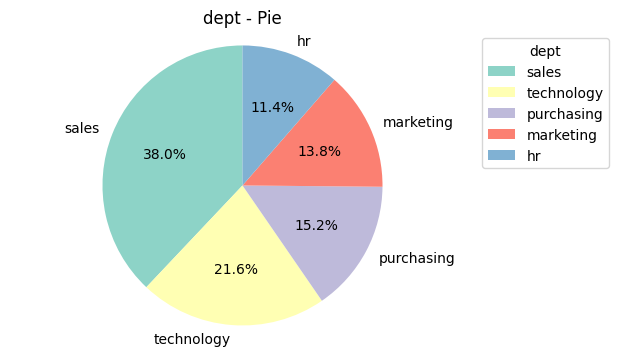

dept
sales         1518
technology     866
purchasing     610
marketing      550
hr             456
Name: count, dtype: int64


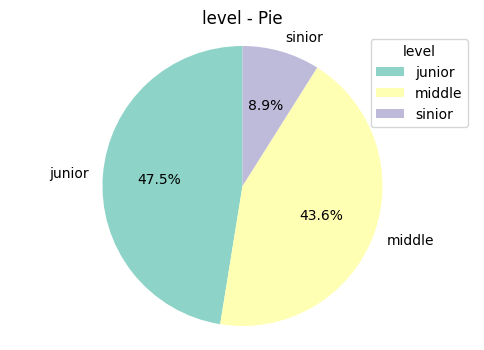

level
junior    1898
middle    1744
sinior     358
Name: count, dtype: int64


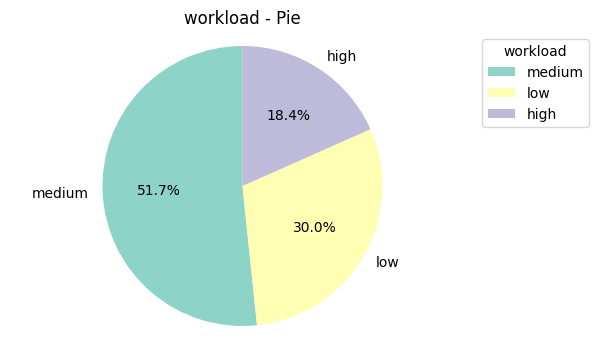

workload
medium    2066
low       1200
high       734
Name: count, dtype: int64


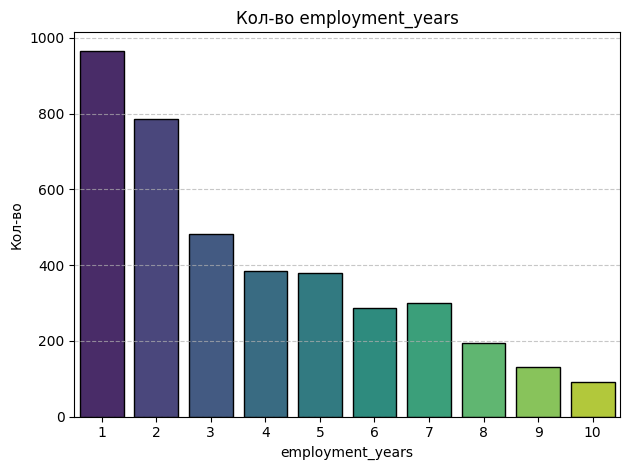

count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


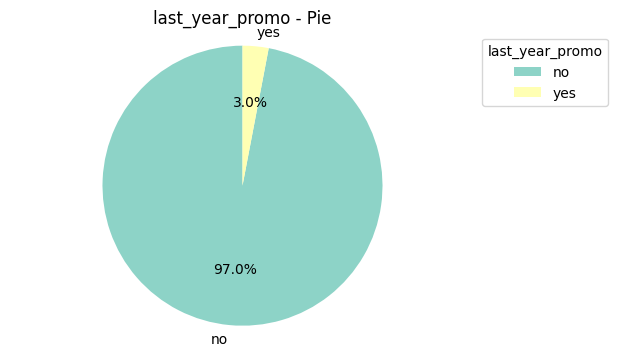

last_year_promo
no     3880
yes     120
Name: count, dtype: int64


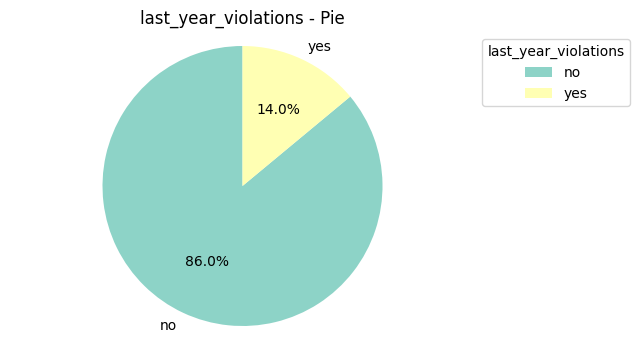

last_year_violations
no     3441
yes     559
Name: count, dtype: int64


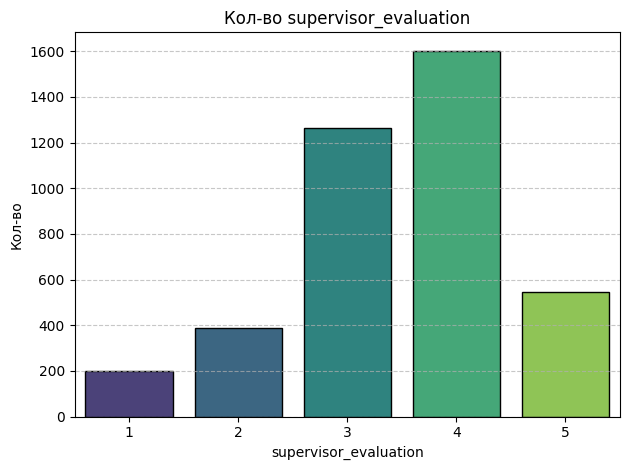

count    4000.000000
mean        3.476500
std         1.008812
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


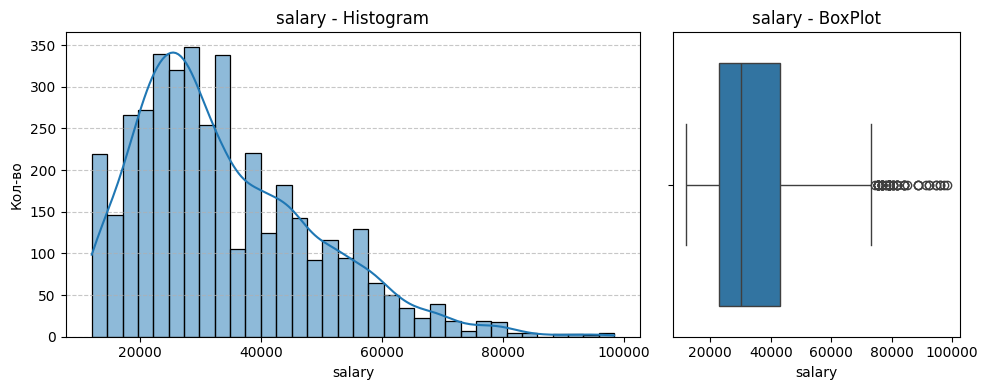


 Описание для salary:
count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64


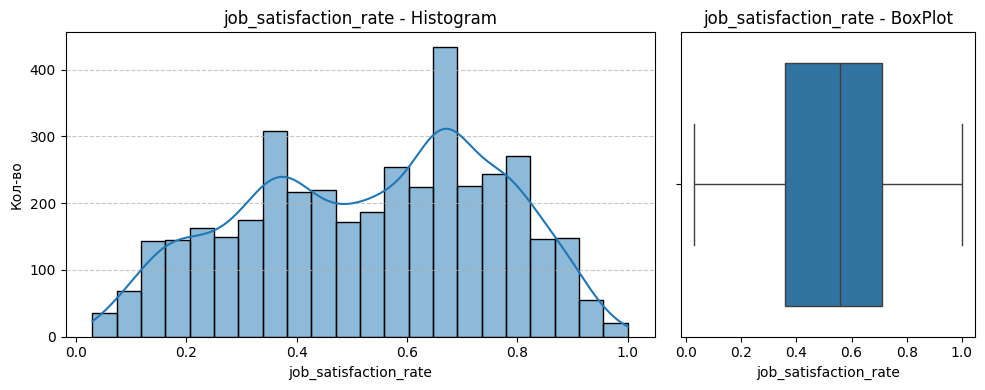


 Описание для job_satisfaction_rate:
count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64


In [24]:
visual_analysis(train_df, ['employment_years', 'supervisor_evaluation'])

In [25]:
train_df.head()

,dept,level,id,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,junior,155278,medium,2,no,no,1,24000,0.58
1,hr,junior,653870,high,2,no,no,5,38400,0.76
2,sales,junior,184592,low,1,no,no,2,12000,0.11
3,technology,junior,171431,low,4,no,no,2,18000,0.37
4,hr,junior,693419,medium,1,no,no,3,22800,0.20


1. По департаментам: больше всего сотрудников в продажах (1508чел), на втором месте идет тех отдел (866чел) и на третьем отдел закупок (610чел).
2. По уровню персонала - 47% джунов, 44% мидлов и 9% сеньоров
3. С загрузкой все отлично - лидирует средняя загрузка (51,6%), треть с низкой загрузкой и с большой 18,4%
4. Медианное значение опыта работы - 3 года. Большая часть сотрудников распредлена с 2 до 6 лет.
5. Повысили за прошедший год всего 120 человек - 3% от общего числа
6. А вот нарушений за тот же период совершили 558 человек - 14%
7. По мнению руководителей чаще всего сотрудники справляются со своими задачами на 4 из 5. Чуть меньше оценок получилось со значением 3. К счастью, 1 на последнем месте
8. С зарплатой, как и должно быть наблюдается нормальное, смещенное вправо с положительным распредлением. Медианное значение 30000. Большая часть распредлена в диапазоне от 22800 дл 43200.
9. Целевой признак нас не радует. Тут бы хотелось видеть одну большую колонку на 1.0, но даже первый квартиль всего 0.36, а есть значения еще меньше.

<b><font color='blue'>Вывод по разделу 4:</font></b>

Анализ данных показывает, что наибольшее количество сотрудников сосредоточено в отделе продаж (1508 чел.), за ним следуют техотдел (866 чел.) и закупки (610 чел.), с преобладанием джунов (47%) и мидлов (44%) среди персонала. Загрузка в основном средняя (51,6%), а опыт работы варьируется от 2 до 6 лет с медианой 3 года. Повышения редки (3%), тогда как нарушения часты (14%). Оценки руководителей чаще 4 из 5, а зарплаты распределены нормальным образом с медианой 30000 и диапазоном 22800–43200. Однако целевой признак демонстрирует низкие значения (первый квартиль 0.36), что указывает на необходимость улучшения.

### Корреляционный анализ


Рассмотрим подробнее зависимость признаков относительно целевого

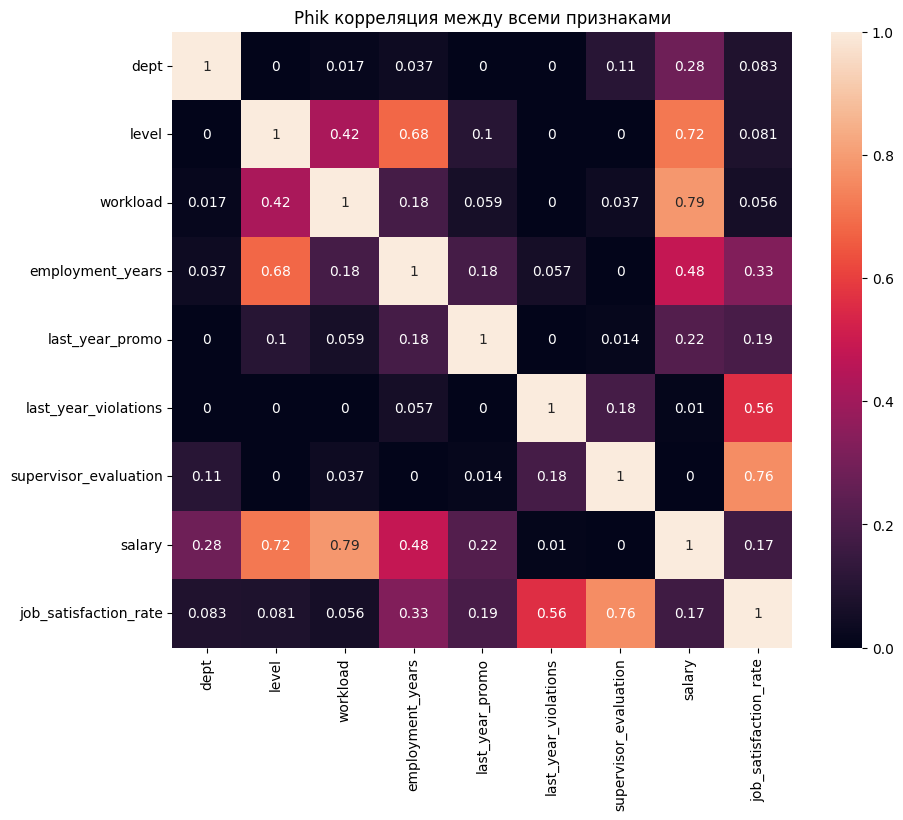

In [26]:
phik_matrix_1 = phik_matrix(train_df.drop(columns='id'), 
                            interval_cols=['salary', 'job_satisfaction_rate'])
plt.figure(figsize=(10,8))
sns.heatmap(phik_matrix_1, annot=True)
plt.title('Phik корреляция между всеми признаками')
plt.show()

Таргет имеет высокую корреляцию только с оценкой руководителя. Наблюдается заметная корреляция с наличием штрафов за прошедший год. Между собой эти признаки не коррелируют.

Уровень человека имеет зависимость от его стажа в компании и с его зарплатой - что вполне логично.

С зарплатой так же коррелирует и загруженность

Рассмотрим скаттеры для таргета и коррелирующих с ним признаков

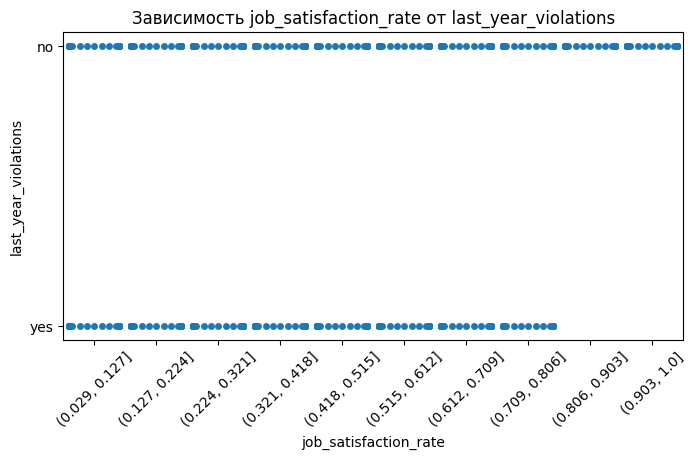

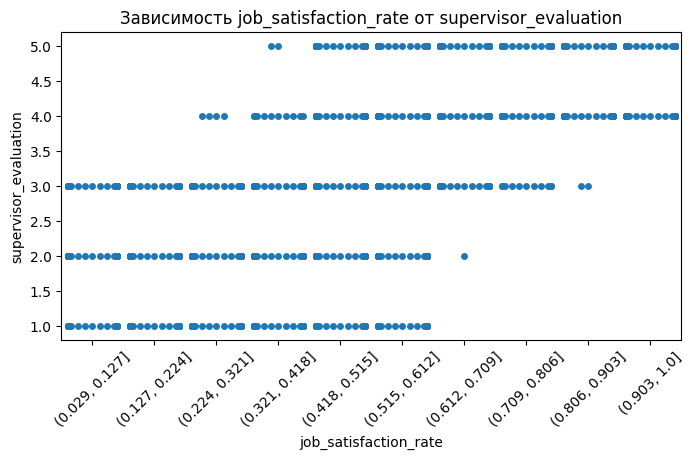

In [27]:
colum = ['last_year_violations','supervisor_evaluation']
job_cut = pd.cut(train_df['job_satisfaction_rate'], bins=10)
                 
for col in colum:
    plt.figure(figsize=(8, 4))
    sns.swarmplot(data=train_df, 
                  x=job_cut, 
                  y=col)
    
    plt.xticks(rotation=45)
    plt.title(f'Зависимость job_satisfaction_rate от {col}')
    plt.show()

Наличие нарушений не дает поставить оценку удовлетворенности работы выше 0.8. Без штрафов люди оценивают и на 1.
Оценка руководства так же влияет на таргет - с единицей никто не ставил от 0.6, практически тоже самое с 2, а дальше по возрастающей. Для людей с оценкой 4 и 5 характерно наоборот отсутствие негатива оценки работы (меньше 0.2).

<b><font color='blue'>Вывод по разделу 5:</font></b>

Анализ корреляций выявил, что таргет имеет высокую корреляцию с оценкой руководителя и заметную с наличием штрафов за прошлый год, при этом эти признаки не коррелируют между собой. Уровень сотрудника логично связан со стажем и зарплатой, а загруженность также коррелирует с зарплатой. Скэттеры показывают, что наличие нарушений ограничивает оценку удовлетворенности работой максимум 0.8, тогда как без штрафов возможны максимальные оценки. Оценка руководства влияет на таргет: при значениях 1 и 2 оценки ниже 0.6 отсутствуют, а при 4 и 5 характерны высокие значения (выше 0.8), что указывает на отсутствие низких оценок удовлетворенности.

### Подготовка данных

In [28]:
train_df.head()

,dept,level,id,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,junior,155278,medium,2,no,no,1,24000,0.58
1,hr,junior,653870,high,2,no,no,5,38400,0.76
2,sales,junior,184592,low,1,no,no,2,12000,0.11
3,technology,junior,171431,low,4,no,no,2,18000,0.37
4,hr,junior,693419,medium,1,no,no,3,22800,0.20


In [29]:
ohe_columns = ['dept', 'supervisor_evaluation', 'last_year_promo', 'last_year_promo', 'last_year_violations']
ord_columns = ['workload', 'level']
num_columns = ['employment_years', 'salary']

[print(train_df[x].unique()) for x in ord_columns]

['medium' 'high' 'low']
['junior' 'middle' 'sinior']


[None, None]

In [30]:
ohe_pipe = Pipeline(
    [
        ('simpleimputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ]
)
ord_pipe = Pipeline(
    [
        ('simpleimputer_after', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan,
                               categories=[['low', 'medium', 'high'],
                                           ['junior','middle', 'sinior']])),
        ('simpleimputer_before', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('scaler', StandardScaler(), num_columns)
    ], remainder='passthrough')

X_train_transform = pd.DataFrame(data=data_preprocessor.fit_transform(X_train), 
                                 columns=data_preprocessor.get_feature_names_out())

X_train_transform.head()

,ohe__dept_hr,ohe__dept_marketing,ohe__dept_purchasing,ohe__dept_sales,ohe__dept_technology,ohe__supervisor_evaluation_1,ohe__supervisor_evaluation_2,ohe__supervisor_evaluation_3,ohe__supervisor_evaluation_4,ohe__supervisor_evaluation_5,ohe__last_year_promo_no,ohe__last_year_promo_yes,ohe__last_year_promo_no,ohe__last_year_promo_yes,ohe__last_year_violations_no,ohe__last_year_violations_yes,ord__workload,ord__level,scaler__employment_years,scaler__salary,remainder__id
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.675991,-0.666273,155278.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,-0.675991,0.300245,653870.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.069351,-1.471705,184592.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.110731,-1.068989,171431.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.069351,-0.746816,693419.0


Благодаря пайплайну преобразованы данные, при этом id не трогались. (я бы его конечно делал потом вместе с обучением модели, но задание хочет сейчас)

<b><font color='blue'>Вывод по разделу 6:</font></b>

Подготовили данные перед обучением модели. Разделили test на целевой и входные данные.

<a id='s4'></a>

### Обучение моделей

Так как необходимо посмотреть несколько моделей, сделаем пайплайн для автоамтизации этого.

In [31]:
def SMAPE(y_true, y_pred):
    pred = np.array(y_pred)
    true = np.array(y_true)
    denominator = (np.abs(true) + np.abs(pred)) / 2
    smape_values = np.abs(true - pred) / denominator
    return 100 / len(pred) * np.sum(smape_values)

SMAPE_scorer = make_scorer(SMAPE, greater_is_better=False)

In [32]:
final_pipe = Pipeline(
[
    ('pre', pre_preprocessor),
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor())
])

param_grid = [
    
    {'models' : [DecisionTreeRegressor(random_state=RANDOM_STATE)],
    'models__max_depth' : range(2,20),
    'models__min_samples_split' : range(2,20),
    'models__min_samples_leaf' : range(1,20),
    'preprocessor__scaler' : [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    {'models' : [LinearRegression()],
     'preprocessor__scaler' : [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {'models' : [Ridge()],
    'preprocessor__scaler' : [StandardScaler(), MinMaxScaler(), 'passthrough']}
]

random_search = RandomizedSearchCV(
    final_pipe,
    param_grid,
    cv=5,
    scoring=SMAPE_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
models_res = pd.DataFrame(random_search.cv_results_)
models_res.mean_test_score = -1 * models_res.mean_test_score
display((models_res.loc[:,['param_models', 'params', 'mean_test_score']]).sort_values('mean_test_score'))
best_model = random_search.best_estimator_
res = SMAPE(y_test, best_model.predict(X_test))
print(f'На тестовой выборке результат лучшей модели по метрике SMAPE составило {res : .2f}')

,param_models,params,mean_test_score
0,DecisionTreeRegressor(random_state=42),"{'preprocessor__scaler': StandardScaler(), 'models__min_samples_split': 11, 'models__min_samples_leaf': 8, 'models__max_depth': 17, 'models': DecisionTreeRegressor(random_state=42)}",15.751118
6,DecisionTreeRegressor(random_state=42),"{'preprocessor__scaler': 'passthrough', 'models__min_samples_split': 2, 'models__min_samples_leaf': 9, 'models__max_depth': 18, 'models': DecisionTreeRegressor(random_state=42)}",15.821391
9,DecisionTreeRegressor(random_state=42),"{'preprocessor__scaler': 'passthrough', 'models__min_samples_split': 9, 'models__min_samples_leaf': 2, 'models__max_depth': 13, 'models': DecisionTreeRegressor(random_state=42)}",15.883934
8,DecisionTreeRegressor(random_state=42),"{'preprocessor__scaler': 'passthrough', 'models__min_samples_split': 3, 'models__min_samples_leaf': 2, 'models__max_depth': 16, 'models': DecisionTreeRegressor(random_state=42)}",16.416755
3,DecisionTreeRegressor(random_state=42),"{'preprocessor__scaler': StandardScaler(), 'models__min_samples_split': 12, 'models__min_samples_leaf': 13, 'models__max_depth': 13, 'models': DecisionTreeRegressor(random_state=42)}",16.635756
4,DecisionTreeRegressor(random_state=42),"{'preprocessor__scaler': MinMaxScaler(), 'models__min_samples_split': 19, 'models__min_samples_leaf': 19, 'models__max_depth': 12, 'models': DecisionTreeRegressor(random_state=42)}",17.133799
5,DecisionTreeRegressor(random_state=42),"{'preprocessor__scaler': MinMaxScaler(), 'models__min_samples_split': 2, 'models__min_samples_leaf': 3, 'models__max_depth': 8, 'models': DecisionTreeRegressor(random_state=42)}",17.466833
2,DecisionTreeRegressor(random_state=42),"{'preprocessor__scaler': 'passthrough', 'models__min_samples_split': 16, 'models__min_samples_leaf': 5, 'models__max_depth': 7, 'models': DecisionTreeRegressor(random_state=42)}",18.573065
7,DecisionTreeRegressor(random_state=42),"{'preprocessor__scaler': MinMaxScaler(), 'models__min_samples_split': 19, 'models__min_samples_leaf': 6, 'models__max_depth': 6, 'models': DecisionTreeRegressor(random_state=42)}",19.259163
1,DecisionTreeRegressor(random_state=42),"{'preprocessor__scaler': 'passthrough', 'models__min_samples_split': 18, 'models__min_samples_leaf': 16, 'models__max_depth': 2, 'models': DecisionTreeRegressor(random_state=42)}",25.099133


На тестовой выборке результат лучшей модели по метрике SMAPE составило  14.76


Проверим адекваттность модели с помощью базовой модели

In [33]:
dm = DummyRegressor(strategy='median')
dm.fit(X_train,y_train)
SMAPE(y_test, dm.predict(X_test))

np.float64(37.55296523042535)

По заданию необходимо сохранить все поэтому сделали df model_res, хранящий основные данные о моделях.

<b><font color='blue'>Вывод по разделу 7:</font></b>

Лучшая модель {'preprocessor__scaler': StandardScaler(), 'models__min_samples_split': 11, 'models__min_samples_leaf': 8, 'models__max_depth': 17, 'models': DecisionTreeRegressor(random_state=42)}. На тестовой выборке показала себя 14.76, что удовлетворяет условию задачи <=15. Сравнили с базовой моделью DummyRegressor() - ее показатель 37,5, что намного хуже, чем полученный нами результат.

###  Выводы по моделям

При решении первой части задания успешо загрузкили данные и провели предобработку. В ходе предобработки удалили пустые значения, что позволило провести исследовательский анализ. Во время исследовательского анализа рассмотрели все признаки, а главное определили, что в большей степени влияет на целевой параметр. 

Целевой параметр коррелирует с оценкой руководителя и наличием штрафов за прошедший год. Между собой эти признаки не коррелируют. Так же были опредлены закономерности: при наличии нарушений и низкой оценки руководства (1,2), удовлетворенность падает.

Получается, в зоне риска ухода сотрудники - с нарушением и низкой оценкой со стороны руководства. При высокой оценке качетсва работы сотрудника - оценка удовлетворенности высокая.

Были разработы модели регрессии. Для оценки использовалась метрика SMAPE. Наилучшим образом себя показала DecisionTreeRegressor, ее показатель на тестовой выборке составило 14,15.

## Задача 2

### Загрузка новых данных

In [34]:
try:
    train_quit_df = pd.read_csv('//Users/macos/composite_project/train_quit.csv')
    test_quit_df = pd.read_csv('//Users/macos/composite_project/test_features.csv')
    test_target_quit_df = pd.read_csv('//Users/macos/composite_project/test_target_quit.csv')
except:
    train_quit_df = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
    test_quit_df = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
    test_target_quit_df = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')

Как и в прошлый раз сразу соединим таргет с входными test

In [35]:
test_quit_df = pd.merge(test_quit_df, test_target_quit_df, on='id')

In [36]:
display(train_quit_df.head())
test_quit_df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,no
1,686555,hr,junior,medium,1,no,no,4,30000,no
2,467458,sales,middle,low,5,no,no,4,19200,no
3,418655,sales,middle,low,6,no,no,4,19200,no
4,789145,hr,middle,medium,5,no,no,5,40800,no


<b><font color='blue'>Вывод по разделу 1:</font></b>

Данные загрузили, присоединим таргет теста к тестовым, как и в прошлый раз для согласованности id и прочего.

### Предобработка

,type,count_dupl,count_nan
id,int64,0,0
dept,object,3995,0
level,object,3997,0
workload,object,3997,0
employment_years,int64,3990,0
last_year_promo,object,3998,0
last_year_violations,object,3998,0
supervisor_evaluation,int64,3995,0
salary,int64,3931,0
quit,object,3998,0


,unique_count
dept,"{'sales': 1438, 'purchasing': 588, 'marketing': 582, 'technology': 928, 'hr': 464}"
level,"{'middle': 1694, 'junior': 1949, 'sinior': 357}"
workload,"{'high': 674, 'medium': 2118, 'low': 1208}"
last_year_promo,"{'no': 3887, 'yes': 113}"
last_year_violations,"{'no': 3455, 'yes': 545}"
quit,"{'no': 2872, 'yes': 1128}"


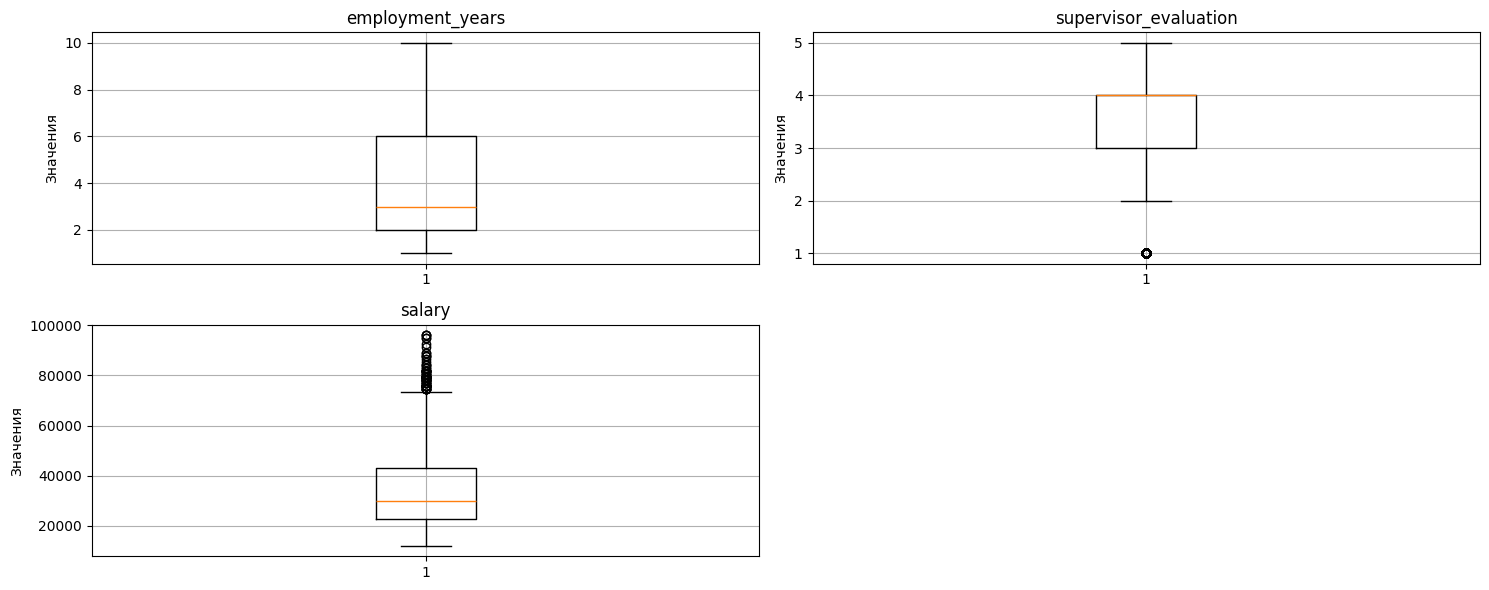

,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000
std,2.541852,1.004049,15152.415163
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [37]:
display(express_analysis(train_quit_df))
display(cat_col_analysis(train_quit_df))
num_col_analysis(train_quit_df)

,type,count_dupl,count_nan
id,int64,0,0
dept,object,1993,2
level,object,1996,1
workload,object,1996,0
employment_years,int64,1990,0
last_year_promo,object,1998,0
last_year_violations,object,1998,0
supervisor_evaluation,int64,1995,0
salary,int64,1934,0
quit,object,1998,0


,unique_count
dept,"{'marketing': 279, 'hr': 227, 'sales': 763, 'purchasing': 273, 'technology': 455, nan: 2, '_': 1}"
level,"{'junior': 974, 'middle': 854, 'sinior': 171, nan: 1}"
workload,"{'medium': 1043, 'low': 593, 'high': 363, '_': 1}"
last_year_promo,"{'no': 1937, 'yes': 63}"
last_year_violations,"{'no': 1738, 'yes': 262}"
quit,"{'no': 1436, 'yes': 564}"


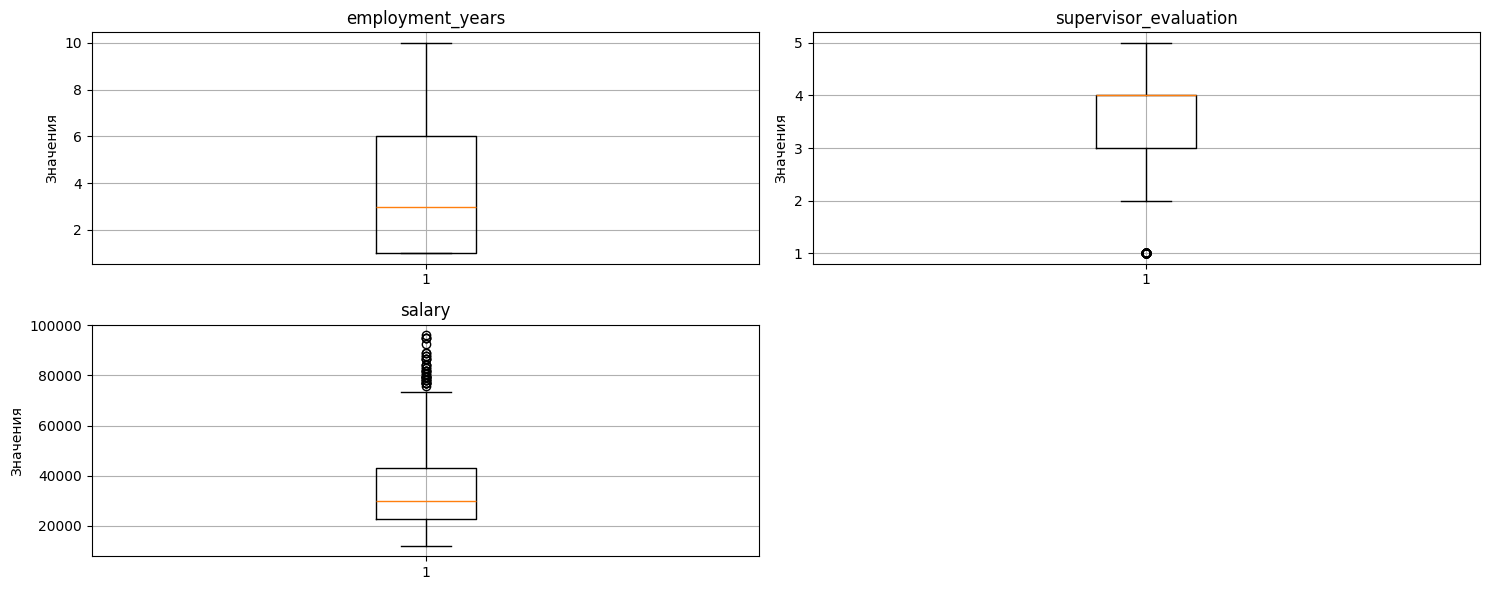

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [38]:
display(express_analysis(test_quit_df))
display(cat_col_analysis(test_quit_df))
num_col_analysis(test_quit_df)

Перешли старые проблемы, поэтому без проверки можем просто заняться их чисткой.

In [39]:
pre_preprocessor.fit(train_quit_df)
test_quit_df = pre_preprocessor.transform(test_quit_df)
display(cat_col_analysis(test_quit_df))

,unique_count
dept,"{'marketing': 279, 'hr': 227, 'sales': 765, 'purchasing': 273, 'technology': 455, '_': 1}"
level,"{'junior': 975, 'middle': 854, 'sinior': 171}"
workload,"{'medium': 1043, 'low': 593, 'high': 363, '_': 1}"
last_year_promo,"{'no': 1937, 'yes': 63}"
last_year_violations,"{'no': 1738, 'yes': 262}"
quit,"{'no': 1436, 'yes': 564}"


<b><font color='blue'>Вывод по разделу 2:</font></b>

Провели предобработку. Очистили данные от некорректных данных. 

### Исследовательский анализ

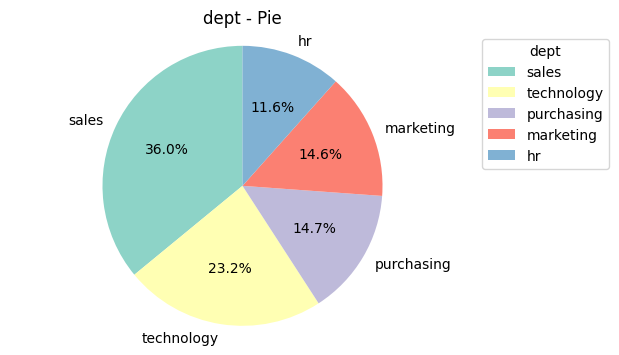

dept
sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: count, dtype: int64


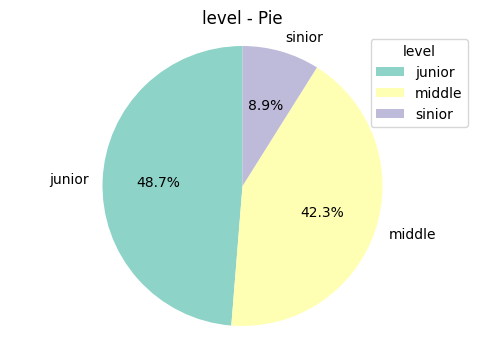

level
junior    1949
middle    1694
sinior     357
Name: count, dtype: int64


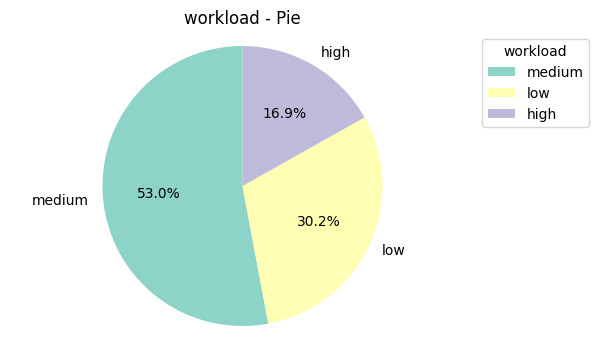

workload
medium    2118
low       1208
high       674
Name: count, dtype: int64


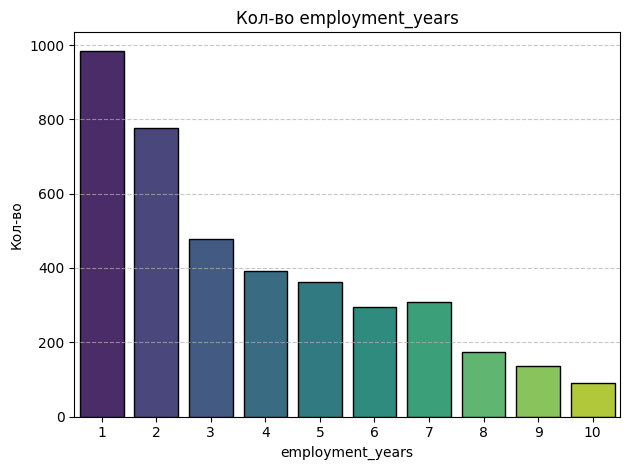

count    4000.000000
mean        3.701500
std         2.541852
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


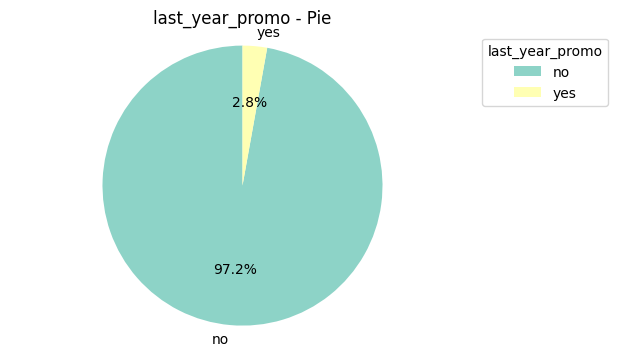

last_year_promo
no     3887
yes     113
Name: count, dtype: int64


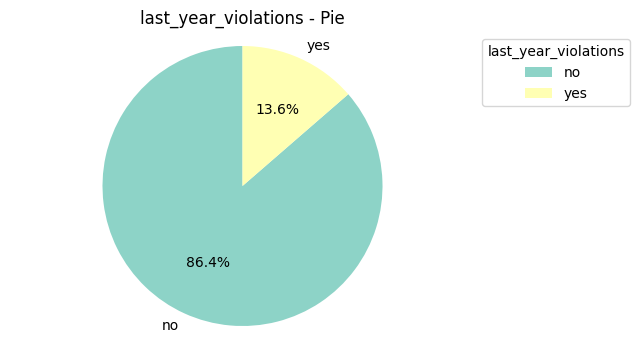

last_year_violations
no     3455
yes     545
Name: count, dtype: int64


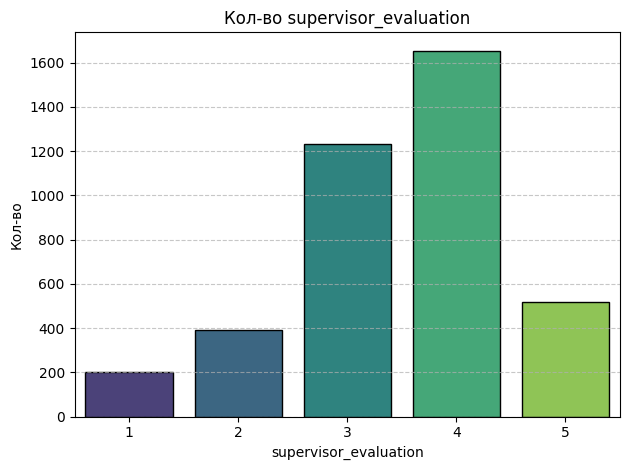

count    4000.000000
mean        3.474750
std         1.004049
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


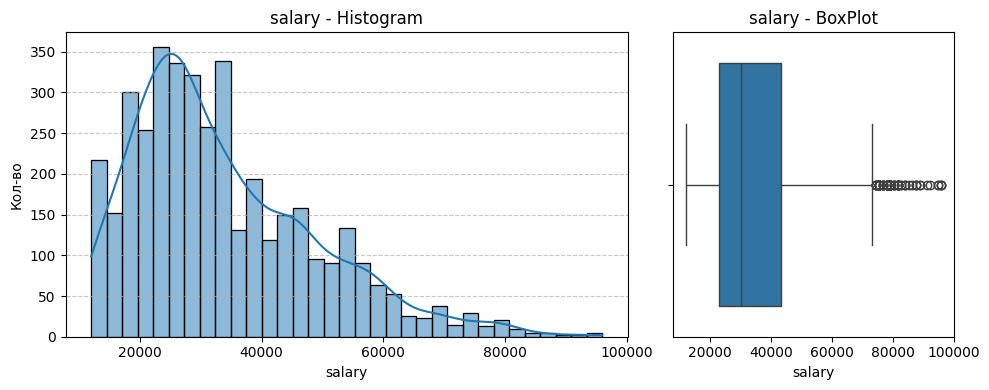


 Описание для salary:
count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


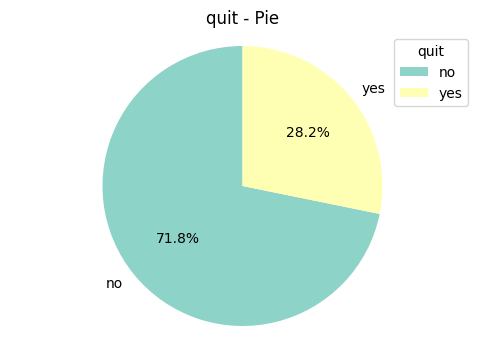

quit
no     2872
yes    1128
Name: count, dtype: int64


In [40]:
visual_analysis(train_quit_df, ['employment_years', 'supervisor_evaluation'])

Распредление входных признаков практически такое же. В данном случае целевой признак распредлен следующим образом: уволилось 28,2% (1128 чел), остались 71,8% (2872чел).

Намного интересснее будет посмотреть зависимости целевого и входных признаков. Что же влияет на принятие решения увольнения.

<b><font color='blue'>Вывод по разделу 3:</font></b>

Закончили исследовательский анализ. Распределение входных признаков практически такое же, по целевому - увольняется 30% сотрудников.

### Корреляционный анализ

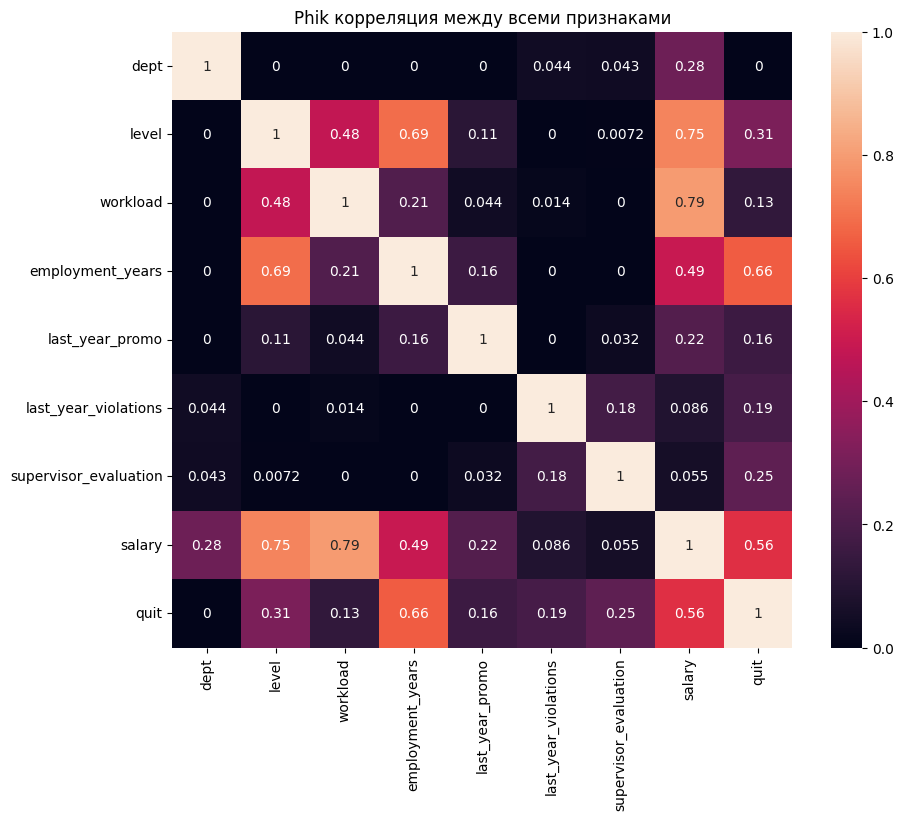

In [41]:
phik_matrix_2 = phik_matrix(train_quit_df.drop(columns='id'), 
                            interval_cols=['salary'])
plt.figure(figsize=(10,8))
sns.heatmap(phik_matrix_2, annot=True)
plt.title('Phik корреляция между всеми признаками')
plt.show()

Целевой признак больше всего коррелирует со стажем и зарплатой - что логично, а подтверждение логичного - это хорошо. Мультиколлениарности не наблюдается.

Анализ портрета уволившегося сотрудника был сосредоточен на признаках <b> employment_years и salary </b>, поскольку корреляционный анализ выявил их как наиболее значимые факторы, влияющие на вероятность увольнения (коэффициенты корреляции 0.66 и 0.56 соответственно, в то время как другие признаки не превышали 0.31). Кроме того, стаж работы и уровень зарплаты представляют собой <b> ключевые экономические показатели </b>, напрямую связанные с мотивацией сотрудников, что делает <b> их приоритетными для оценки</b> в рамках текущей задачи оптимизации удержания персонала.

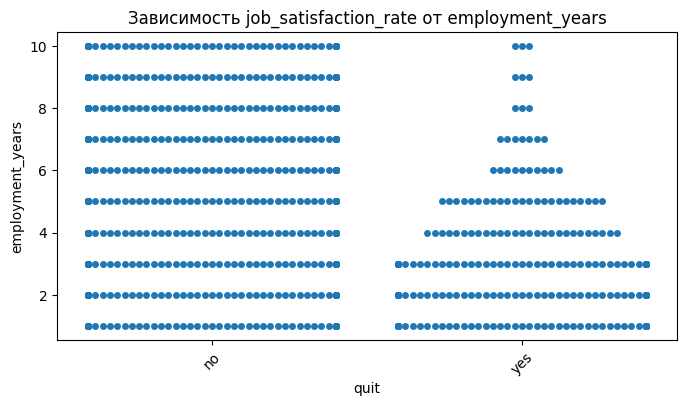

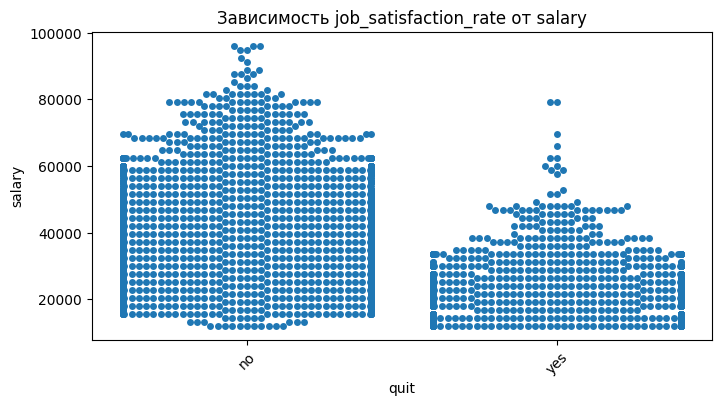

In [42]:
colum = ['employment_years','salary']
                 
for col in colum:
    plt.figure(figsize=(8, 4))
    sns.swarmplot(data=train_quit_df, 
                  x='quit', 
                  y=col)
    
    plt.xticks(rotation=45)
    plt.title(f'Зависимость job_satisfaction_rate от {col}')
    plt.show()

Заметно, что сотрудники чаще увольняются, при не долгой работе и при не высокой зарплате. Общий портрет уволняющихся людей - работа менее 4-6 лет, зарплата менее 50000.

<b><font color='blue'>Вывод по разделу 4:</font></b>

Корреляционный анализ дал основания предпологать, что портрет сотрудника, который уволился - зарплата менее 50к, стаж меньше 5 лет.

### Взаимосвязь целевых признаков

В этом разделе исследуем взаимосвязь удовлетворенностью работой и фактом увольнения на тестовых данных(звучит и правда, как связанные вещи)

In [43]:
full_test_df = pd.merge(test_df, test_quit_df[['id', 'quit']], on='id')
full_test_df.head()

,dept,level,id,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,marketing,junior,485046,medium,2,no,no,5,28800,0.79,no
1,hr,junior,686555,medium,1,no,no,4,30000,0.72,no
2,sales,middle,467458,low,5,no,no,4,19200,0.64,no
3,sales,middle,418655,low,6,no,no,4,19200,0.60,no
4,hr,middle,789145,medium,5,no,no,5,40800,0.75,no


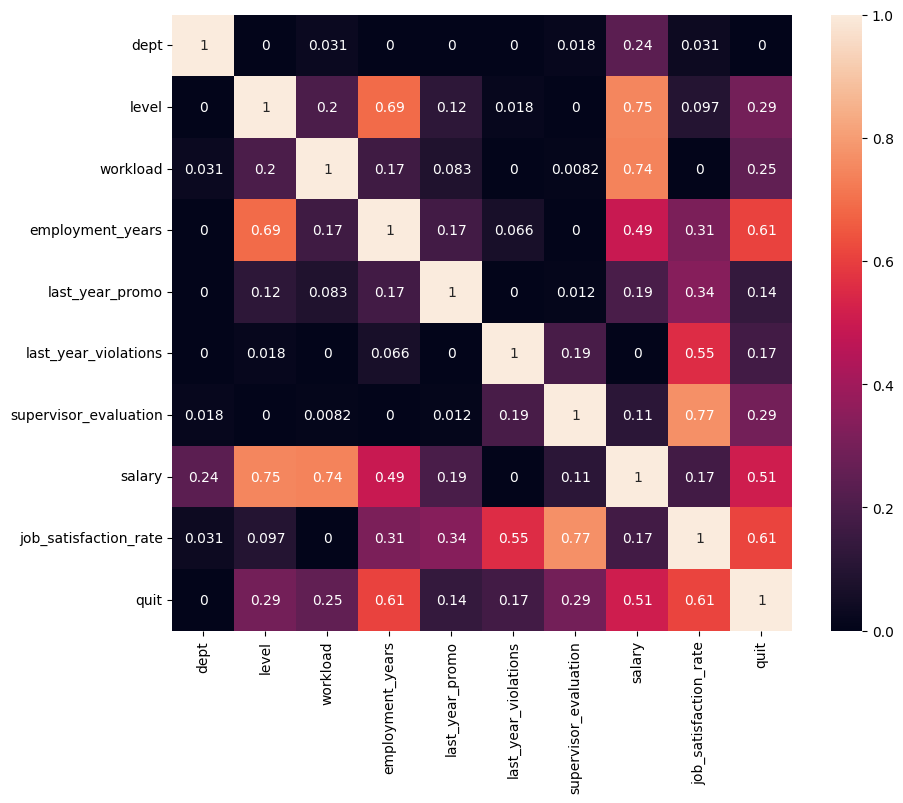

In [44]:
phik_matrix_3 = phik_matrix(full_test_df.drop(columns='id'), 
                            interval_cols=['salary', 'job_satisfaction_rate'])
plt.figure(figsize=(10,8))
sns.heatmap(phik_matrix_3, annot=True, vmin=0)
plt.show()

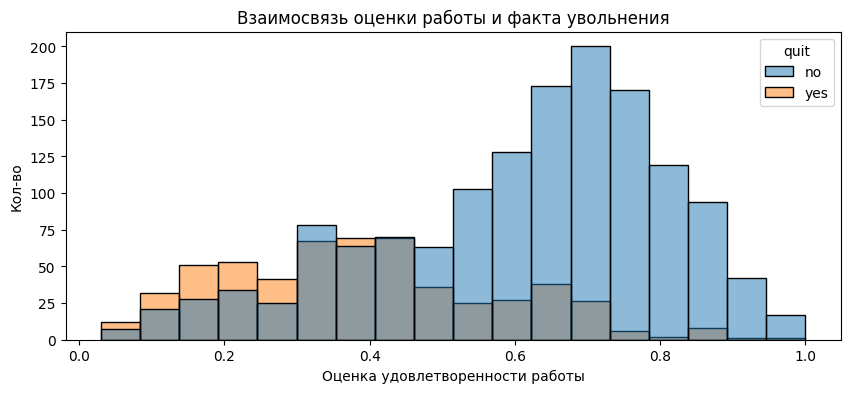

In [45]:
plt.figure(figsize=(10,4))
sns.histplot(data=full_test_df.drop(columns='id'), x='job_satisfaction_rate', hue='quit')
plt.title('Взаимосвязь оценки работы и факта увольнения')
plt.xlabel('Оценка удовлетворенности работы')
plt.ylabel('Кол-во')
plt.show()

Стоит заметить наличие взаимосвязи. Корреляция составляет 0.61, что можно названить "Заметной" по шкале Чеддока. По графику распредления видно, что, как не странно, люди с неименьшей удовлетворенностью работой увольняются чаще, чем с высокой оценкой работы.

<b><font color='blue'>Вывод по разделу 5:</font></b>

Сопоставив данные удалось опредлеить зависимость оценки удовлетворенностью работой и фактом увольнения. Будем рассматривать оценку, как входной признак для классификации по целевому уволился или нет.

<a id='s7'></a>

### Обучение модели

#### Подготовка входных признаков

Так как мы заметили большую зависимость между удовлетворенностью работой и фактом увольнения, первое сделаем входным признаком для второго (фактом увольнения). Сделаем модель классификации и добавим предсказания первой модели. 

Допустим, job_satisfaction_rate и quit действительно связаны и вы получили необходимое значение метрики в первой задаче. Тогда добавьте job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

Если я правильно понял, то надо взять train quit и добавить предсказанный predict от best_model. 

In [46]:
full_train_quit_df = train_quit_df.copy()
full_test_quit_df = test_quit_df.copy()

full_train_quit_df['job_satisfaction_pred'] = best_model.predict(train_quit_df.drop(columns='quit'))
full_test_quit_df['job_satisfaction_pred'] = best_model.predict(test_quit_df.drop(columns='quit'))

le = LabelEncoder()
y_train_clf = pd.Series(le.fit_transform(full_train_quit_df.quit))
y_test_clf = pd.Series(le.transform(full_test_quit_df.quit))

print(le.classes_)
display(full_train_quit_df.head())
full_test_quit_df.head()

['no' 'yes']


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_pred
0,723290,sales,middle,high,2,no,no,4,54000,no,0.620000
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.776250
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.402857
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.346250
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.852222


,dept,level,id,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_pred
0,marketing,junior,485046,medium,2,no,no,5,28800,no,0.828000
1,hr,junior,686555,medium,1,no,no,4,30000,no,0.673846
2,sales,middle,467458,low,5,no,no,4,19200,no,0.705385
3,sales,middle,418655,low,6,no,no,4,19200,no,0.672000
4,hr,middle,789145,medium,5,no,no,5,40800,no,0.662500


#### Подготовка данных

In [47]:
param_grid_classifier = [
    
    {'models' : [KNeighborsClassifier()],
    'models__n_neighbors' : range(3,7),
    'preprocessor__scaler' : [StandardScaler(), MinMaxScaler(), 'passthrough']},
    
    {'models' : [DecisionTreeClassifier(random_state=RANDOM_STATE)],
    'models__max_depth' : range(2,7),
    'models__min_samples_split' : range(2,5),
    'preprocessor__scaler' : [StandardScaler(), MinMaxScaler(), 'passthrough']},
    
    {'models' : [LogisticRegression(random_state=RANDOM_STATE, penalty='l1', solver='liblinear')],
    'models__C' : range(1,5),
    'preprocessor__scaler' : [StandardScaler(), MinMaxScaler(), 'passthrough']}
]

In [48]:
%time
random_search = RandomizedSearchCV(
    final_pipe,
    param_grid_classifier,
    cv=5,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    scoring='roc_auc')


random_search.fit(full_train_quit_df.drop(columns='quit'), y_train_clf)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.15 µs


,estimator,Pipeline(step...Regressor())])
,param_distributions,"[{'models': [KNeighborsClassifier()], 'models__n_neighbors': range(3, 7), 'preprocessor__scaler': [StandardScaler(), MinMaxScaler(), ...]}, {'models': [DecisionTreeC...ndom_state=42)], 'models__max_depth': range(2, 7), 'models__min_samples_split': range(2, 5), 'preprocessor__scaler': [StandardScaler(), MinMaxScaler(), ...]}, ...]"
,n_iter,10
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [49]:
best_model_classifier = random_search.best_estimator_
print('Лучшая модель и её параметры:\n\n', best_model_classifier)
print ('Метрика лучшей модели по кросс валидации:', random_search.best_score_)
result = pd.DataFrame(random_search.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score'))

Лучшая модель и её параметры:

 Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simp',
                                                  Pipeline(steps=[('simp',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['dept', 'level'])],
                                   verbose_feature_names_out=False)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_fr...
                                                                   OrdinalEncoder(categories=[['low',
                                                             

,rank_test_score,param_models,mean_test_score,params
2,1,DecisionTreeClassifier(random_state=42),0.921995,"{'preprocessor__scaler': 'passthrough', 'models__min_samples_split': 4, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}"
8,1,DecisionTreeClassifier(random_state=42),0.921995,"{'preprocessor__scaler': 'passthrough', 'models__min_samples_split': 3, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}"
4,3,DecisionTreeClassifier(random_state=42),0.920199,"{'preprocessor__scaler': 'passthrough', 'models__min_samples_split': 3, 'models__max_depth': 6, 'models': DecisionTreeClassifier(random_state=42)}"
7,4,DecisionTreeClassifier(random_state=42),0.918615,"{'preprocessor__scaler': StandardScaler(), 'models__min_samples_split': 3, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}"
0,5,DecisionTreeClassifier(random_state=42),0.907352,"{'preprocessor__scaler': MinMaxScaler(), 'models__min_samples_split': 2, 'models__max_depth': 3, 'models': DecisionTreeClassifier(random_state=42)}"
5,6,DecisionTreeClassifier(random_state=42),0.878791,"{'preprocessor__scaler': StandardScaler(), 'models__min_samples_split': 4, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}"
9,6,DecisionTreeClassifier(random_state=42),0.878791,"{'preprocessor__scaler': StandardScaler(), 'models__min_samples_split': 2, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}"
1,8,KNeighborsClassifier(),0.497601,"{'preprocessor__scaler': StandardScaler(), 'models__n_neighbors': 3, 'models': KNeighborsClassifier()}"
6,9,KNeighborsClassifier(),0.497006,"{'preprocessor__scaler': MinMaxScaler(), 'models__n_neighbors': 6, 'models': KNeighborsClassifier()}"
3,10,KNeighborsClassifier(),0.490992,"{'preprocessor__scaler': MinMaxScaler(), 'models__n_neighbors': 4, 'models': KNeighborsClassifier()}"


In [50]:
y_pred = best_model_classifier.predict_proba(full_test_quit_df.drop(columns='quit'))[:,1]
print(f'ROC_AUC на тестовой выборке составило {roc_auc_score(y_test_clf,y_pred)}')

ROC_AUC на тестовой выборке составило 0.910965373673917


На тренировочной выборке лучше всего себя показала DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42))]). Ее результат ROC_AUC составил 0.9109 на тестовой выборке, что удовлетворяют критерию приемлимости >=0.91.

Составим список работников, вероятность увольнения которых модель оценила больше 80%

In [51]:
test_quit_df['pred'] = best_model_classifier.predict_proba(full_test_quit_df.drop(columns='quit'))[:,1]
risk_id = test_quit_df.query('pred >= 0.8')['id']
print(f'Людей, вероятность увольнения которых составляет больше 80% - {risk_id.shape[0]} человек.')

Людей, вероятность увольнения которых составляет больше 80% - 424 человек.


<b><font color='blue'>Вывод по разделу 6:</font></b>

С помощью пайплайна подобрали лучшую модель для классификации. Этой моделью стала DecisionTreeClassifier. Ее метрика ROC_AUC на тестовой выборке составила 0.915. Определили группу риска увольнения 80% - 425 человек.

### Значимость признаков

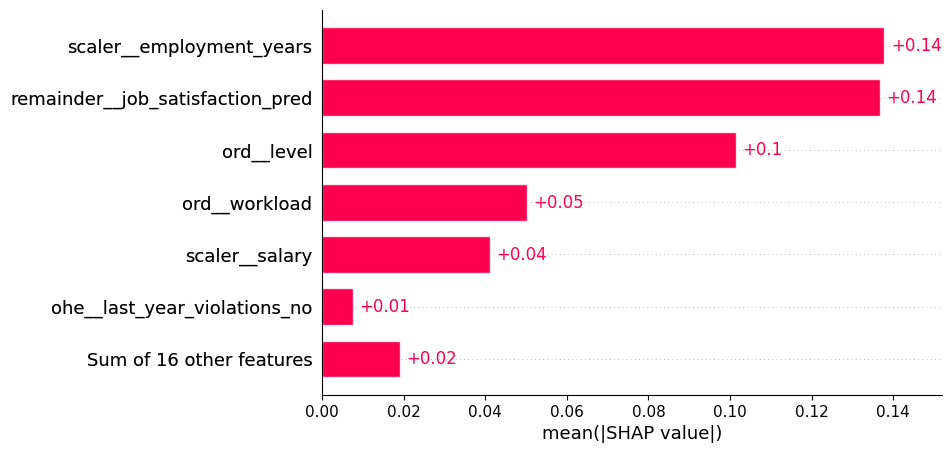

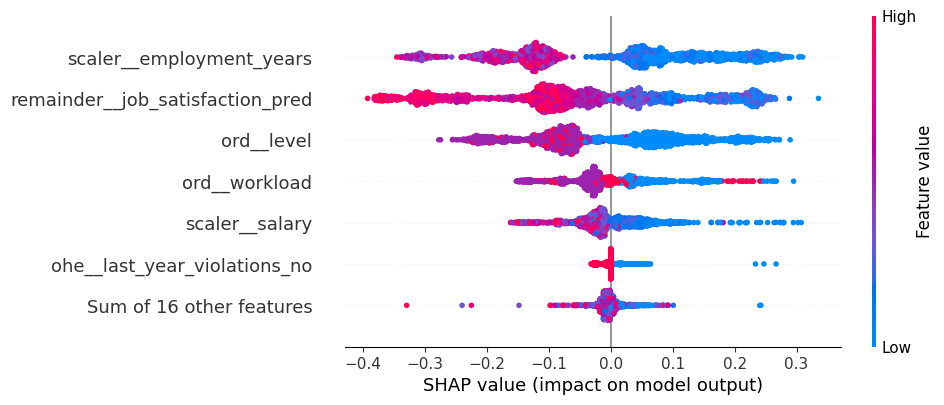

In [52]:
X_train_processed = (random_search.best_estimator_
                     .named_steps['preprocessor']
                     .fit_transform(full_train_quit_df.drop(columns=['quit'])))

X_summary = shap.sample(X_train_processed, nsamples=50)

X_test_processed = (random_search.best_estimator_
                    .named_steps['preprocessor']
                    .transform(full_test_quit_df.drop(columns=['quit'])))

explainer = shap.Explainer(random_search.best_estimator_.named_steps['models'].predict_proba, X_summary)
feature_names = random_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)
shap_values = explainer(X_test_df)
shap.plots.bar(shap_values[..., 1], max_display=7)
shap.plots.beeswarm(shap_values[..., 1], max_display=7)

<b><font color='blue'>Вывод по разделу 7:</font></b>

Наиболее значимыми признаками для предсказания увольнения оказались оценка удовлетворённостью работой, стаж работы и уровень работника, тогда как большая часть остальных признаков вносит минимальный вклад. Пчелиный график подтверждает, что снижение оценки удовлетворённостью работой и уменьшение стажа увеличивают вероятность увольнения, что согласуется с выводами, сделанными на этапе EDA.

 ### Сегментация по группам риска

<Figure size 800x600 with 0 Axes>

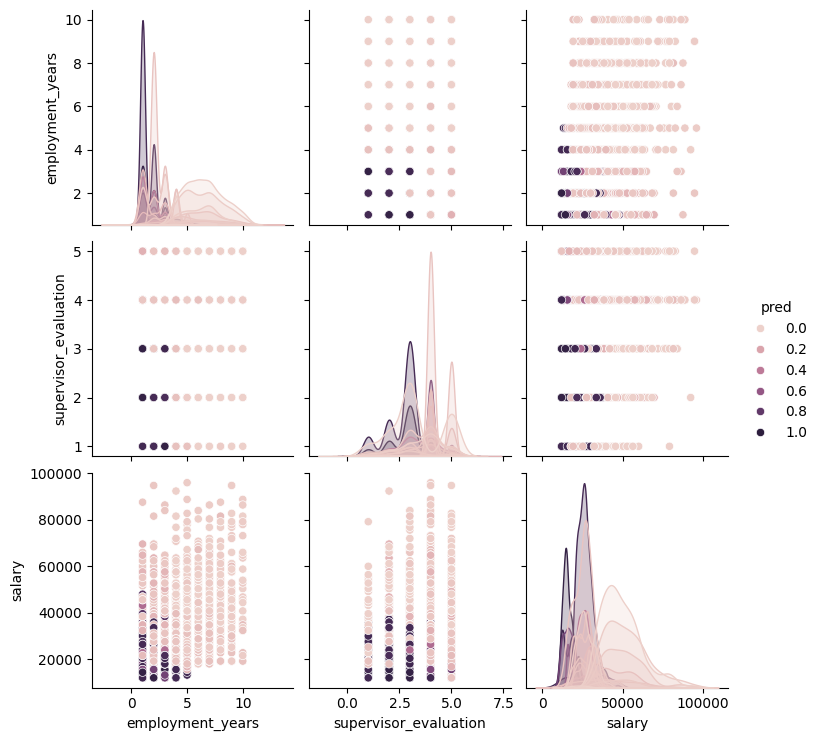

In [53]:
plt.figure(figsize=(8, 6))
sns.pairplot(data=test_quit_df.loc[ : , test_quit_df.columns != 'id'], hue ='pred')
plt.show(close=None, block=None)

<b><font color='blue'>Вывод по разделу 8:</font></b>
    
Больше всего людей подверженных риску увольнения находится в группе с зарплатой до 50000 и стажем до 4 лет (что подтверждает EDA). Так же большая вероятность увольнения и у тех, кого руководитель оценивает на 2-3, и зарплата до 40000.

### Общие выводы

Проект охватил ряд ключевых этапов, каждый из которых способствовал достижению поставленных целей. В разделе 1 данные были успешно загружены, а таргет теста интегрирован в тестовый набор для обеспечения согласованности идентификаторов. Раздел 2 включал предобработку, в ходе которой были устранены пропуски и некорректные значения, что создало основу для дальнейшего анализа. В разделе 3 проведён исследовательский анализ, выявивший структуру персонала: преобладание сотрудников в отделе продаж (1508 чел.), джунов (47%) и мидлов (44%), среднюю загрузку (51,6%), опыт работы от 2 до 6 лет с медианой 3 года, редкие повышения (3%) и частые нарушения (14%). Зарплаты демонстрируют нормальное распределение с медианой 30000 в диапазоне 22800–43200, однако низкие значения целевого признака (первый квартиль 0.36) указывают на необходимость улучшения.

В разделе 4 корреляционный анализ показал высокую связь таргета с оценкой руководителя и заметную — с наличием штрафов, при отсутствии корреляции между этими признаками. Уровень сотрудника коррелирует со стажем и зарплатой, а загруженность — с оплатой. Скэттеры подтвердили, что нарушения ограничивают удовлетворённость работой максимум 0.8, а высокие оценки руководителя (4–5) связаны с её ростом выше 0.8. Во второй части проекта (разделы 1–3) предобработка и анализ повторили подход первой части, выделив портрет уволившихся с зарплатой до 50 тыс. и стажем менее 5 лет, а также зависимость от оценки удовлетворённости. Раздел 5 обосновал использование этой оценки как входного признака для классификации.

Разделы 6 и 7 сосредоточились на моделировании. Для первой задачи регрессии DecisionTreeRegressor с метрикой SMAPE 14,76 на тесте удовлетворила условие менее 15. Во второй части DecisionTreeClassifier с ROC_AUC 0.9109 на тесте определила группу риска — 425 человек с вероятностью увольнения 80%, подтвердив значимость оценки удовлетворённости, стажа и уровня. Пчелиный график в разделе 7 поддержал выводы EDA о росте риска увольнения при снижении этих показателей. Раздел 8 выявил, что наибольшая уязвимость характерна для сотрудников с зарплатой до 50 тыс. и стажем до 4 лет, а также с оценками 2–3 и зарплатой до 40 тыс.

Проект успешно решил поставленные задачи, предоставив модельные решения и анализ факторов, влияющих на текучесть кадров, что позволяет сосредоточить усилия на улучшении условий для групп риска.